<a href="https://colab.research.google.com/github/mmorari-cmyk/CURSO_SE.ALES_Y_SISTEMAS/blob/main/Tarea_serie_fourier_pulso_triangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

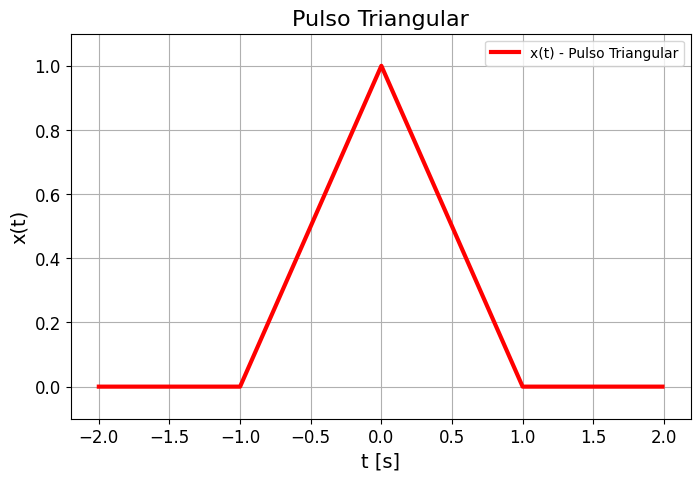

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from ipywidgets import interact, IntSlider
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#onfiguraciones iniciales de Matplotlib
warnings.filterwarnings("ignore")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 1) Definición de la Señal Triangular

# Parámetros de la señal
B = 1.0    # Amplitud
T = 4.0    # Período
d1 = 1.0   # Mitad de la base del triángulo

# Parámetros de la simulación
Fs = 100   # Frecuencia de muestreo
tv = np.arange(-T/2, T/2, 1/Fs) # Vector de tiempo para un período
Nm = len(tv) # Número de muestras

# Creación de la señal x(t)
xo = np.zeros_like(tv)

# Rampa ascendente: -d1 <= t <= 0
mask_asc = (tv >= -d1) & (tv <= 0)
xo[mask_asc] = (B / d1) * tv[mask_asc] + B

# Rampa descendente: 0 < t <= d1
mask_desc = (tv > 0) & (tv <= d1)
xo[mask_desc] = (-B / d1) * tv[mask_desc] + B

# --- Graficar la señal original ---
plt.figure(figsize=(8, 5))
plt.plot(tv, xo, 'r', linewidth=3, label='x(t) - Pulso Triangular')
plt.grid(True)
plt.xlabel("t [s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.title("Pulso Triangular", fontsize=16)
plt.ylim(-0.1, B + 0.1)
plt.legend()
plt.show()

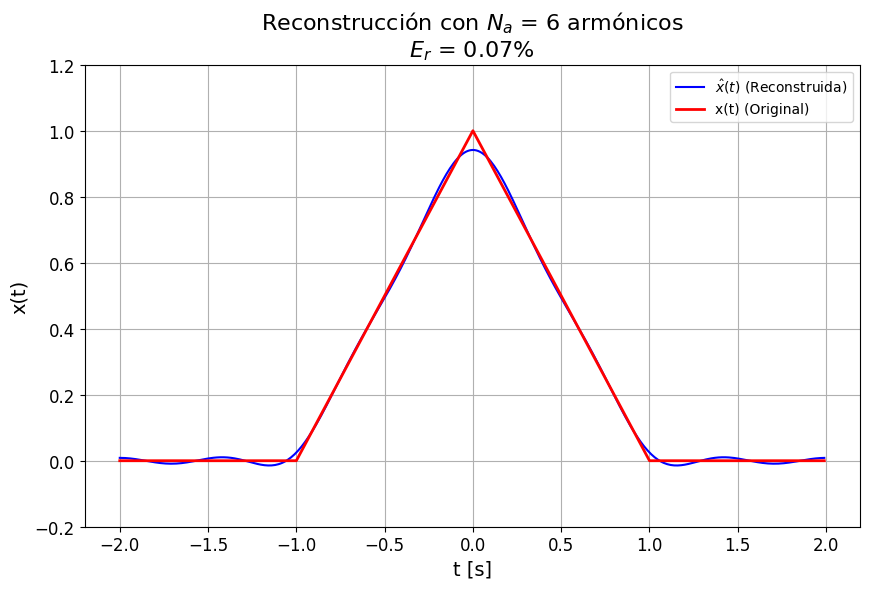

In [37]:
# --- 4) Reconstrucción de la Señal y Cálculo del Error ---

# Potencia de la señal original x(t)
# Se calcula como el valor medio del cuadrado de la señal
Px = np.mean(np.abs(xo)**2)

def pltest(Na=1):
    """
    Función interactiva para reconstruir la señal y calcular el error
    en función del número de armónicos (Na).
    """
    # Seleccionar los índices de los armónicos a usar (-Na a +Na)
    # En nuestro arreglo, esto va de (N-Na) a (N+Na)
    ind = np.arange(N - Na, N + Na + 1)

    # Reconstruir la señal usando los coeficientes y las bases
    # xe(t) = sum(c_n * phi_n(t))
    xe = phin[:, ind].dot(cn[ind]) # Producto punto para hacer la suma ponderada

    # Calcular la potencia de la señal reconstruida usando los coeficientes
    Pc_sum = np.sum(np.abs(cn[ind])**2)

    # Calcular el error relativo
    er = (1 - Pc_sum / Px) * 100 if Px > 0 else 0

    # --- Graficar ---
    plt.figure(figsize=(10, 6))
    # Se grafica la parte real de xe, la imaginaria debe ser casi cero
    plt.plot(tv, np.real(xe), 'b', label=r'$\hat{x}(t)$ (Reconstruida)')
    plt.plot(tv, xo, 'r', linewidth=2, label='x(t) (Original)')

    plt.title(f'Reconstrucción con $N_a$ = {Na} armónicos\n$E_r$ = {er:.2f}%', fontsize=16)
    plt.xlabel('t [s]', fontsize=14)
    plt.ylabel('x(t)', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.ylim(-0.2, B + 0.2)
    plt.show()

# --- Crear el widget interactivo ---
interact(pltest, Na=IntSlider(min=0, max=N, step=1, value=1, description='Armónicos (Na):'));

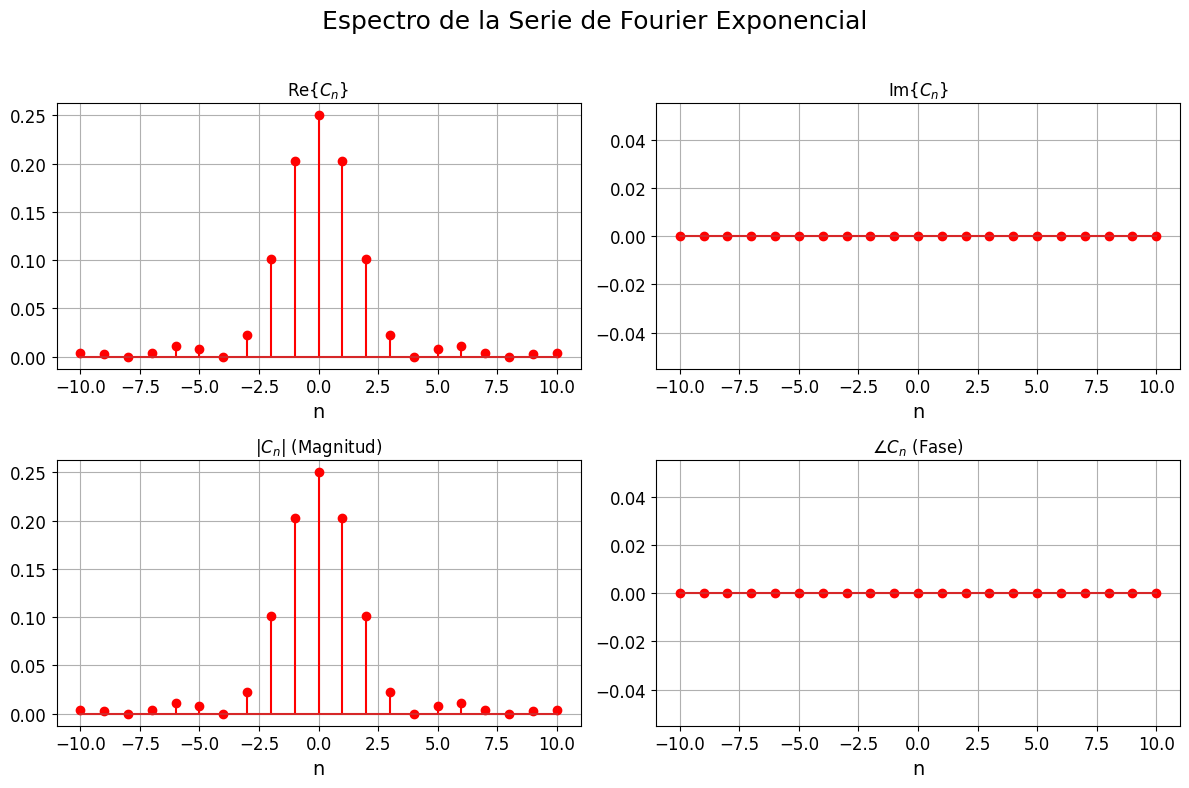

In [33]:
# --- 3) Cálculo y Gráfica del Espectro ---

# Rango de armónicos para el cálculo
nv = np.arange(-N, N + 1)
cn = np.zeros(2 * N + 1, dtype=np.complex128)

# Fórmula para los coeficientes c_n del pulso triangular
# (Excluyendo n=0 para evitar división por cero)
n_nonzero = nv[nv != 0]
cn_nonzero = (B * T / ((np.pi**2) * d1 * (n_nonzero**2))) * (np.sin(np.pi * n_nonzero * d1 / T)**2)

# Asignar los coeficientes calculados
cn[nv != 0] = cn_nonzero

# Calcular c_0 por separado
c0 = (B * d1) / T
cn[N] = c0  # El índice para n=0 es N en nuestro arreglo

# --- Graficar el
fig_spec, axes_spec = plt.subplots(2, 2, figsize=(12, 8))
fig_spec.suptitle("Espectro de la Serie de Fourier Exponencial", fontsize=18)

# 1. Parte Real
axes_spec[0, 0].stem(nv, np.real(cn), 'r')
axes_spec[0, 0].set_title('Re{$C_n$}')
axes_spec[0, 0].set_xlabel('n')
axes_spec[0, 0].grid(True)

# 2. Parte Imaginaria
axes_spec[0, 1].stem(nv, np.imag(cn), 'r')
axes_spec[0, 1].set_title('Im{$C_n$}')
axes_spec[0, 1].set_xlabel('n')
axes_spec[0, 1].grid(True)

# 3. Magnitud
axes_spec[1, 0].stem(nv, np.abs(cn), 'r')
axes_spec[1, 0].set_title('|$C_n$| (Magnitud)')
axes_spec[1, 0].set_xlabel('n')
axes_spec[1, 0].grid(True)

# 4. Fase
axes_spec[1, 1].stem(nv, np.angle(cn), 'r')
axes_spec[1, 1].set_title('∠$C_n$ (Fase)')
axes_spec[1, 1].set_xlabel('n')
axes_spec[1, 1].grid(True)

fig_spec.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [38]:
# 7) Animación Completa y Detallada de la Reconstrucción
# se usa un layout de 2 filas y 2 columnas para claridad
fig_anim_full, ax = plt.subplots(2, 2, figsize=(14, 8))

# Ajustar el layout para que el gráfico inferior sea más ancho
gs = ax[0, 0].get_gridspec()
for a in ax[1, :]:
    a.remove()
ax_bottom = fig_anim_full.add_subplot(gs[1, :])


def update_full_animation(Na):

    # Limpiar todos los ejes en cada cuadro
    ax[0, 0].clear()
    ax[0, 1].clear()
    ax_bottom.clear()

    #1. Espectro (Panel Superior Izquierdo)
    ind = np.arange(N - Na, N + Na + 1)

    # Dibuja todos los armónicos en azul
    ax[0, 0].stem(nv, np.abs(cn), linefmt='b-', markerfmt='bo', basefmt=' ', label='No usados')
    # Resalta los armónicos usados en rojo
    ax[0, 0].stem(nv[ind], np.abs(cn[ind]), linefmt='r-', markerfmt='ro', basefmt=' ', label='Usados')

    ax[0, 0].set_ylabel('$|c_n|$')
    ax[0, 0].set_xlabel('n [rad/s]')
    ax[0, 0].set_title('Magnitud del Espectro')
    ax[0, 0].grid(True)
    ax[0, 0].legend()

    #2. Componentes Espectrales (Paneles Superiores Derecho)
    # ce_n(t) = c_n * phi_n(t)
    ce = phin[:, ind] * cn[ind]

    # Parte Real
    ax[0, 1].plot(tv, np.real(ce))
    ax[0, 1].set_xlabel('t [s]')
    ax[0, 1].set_ylabel(r'$Re\{c_n \phi_n(t)\}$')
    ax[0, 1].set_title('Componentes Reales')
    ax[0, 1].grid(True)

    # # Parte Imaginaria (Estará vacía para la señal triangular)
    # ax[0, 2].plot(tv, np.imag(ce))
    # ax[0, 2].set_xlabel('t [s]')
    # ax[0, 2].set_ylabel(r'$Im\{c_n \phi_n(t)\}$')
    # ax[0, 2].set_title('Componentes Imaginarios')
    # ax[0, 2].grid(True)

    # 3. Reconstrucción y Error (Panel Inferior)
    # Señal reconstruida
    xe = phin[:, ind].dot(cn[ind])
    # Señal de error
    et = xo - np.real(xe)

    # Potencia y Error
    Pc_sum = np.sum(np.abs(cn[ind])**2)
    er = (1 - Pc_sum / Px) * 100 if Px > 0 else 0

    ax_bottom.plot(tv, xo, 'r', linewidth=2, label='$x(t)$ (Original)')
    ax_bottom.plot(tv, np.real(xe), 'b', label=r'$\hat{x}(t)$ (Reconstruida)')
    ax_bottom.plot(tv, et, 'g', label='$e(t)$ (Error)')

    ax_bottom.set_title(f'$E_r = {er:.2f}$% para $N_a = {Na}$', fontsize=14)
    ax_bottom.set_xlabel('t [s]')
    ax_bottom.set_ylabel('x(t)')
    ax_bottom.legend(loc='upper right')
    ax_bottom.grid(True)
    ax_bottom.set_ylim(-0.2, B + 0.2)

    fig_anim_full.tight_layout()


# --- Crear y desplegar la animación ---
anim_full = FuncAnimation(fig_anim_full, update_full_animation, frames=range(N + 1), blit=False, interval=400)

plt.close(fig_anim_full)
HTML(anim_full.to_jshtml())